# Análisis de Emociones Tweets

In [1]:
#Juan Ernesto Díaz Noguez - A01653546
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
from textblob import TextBlob

sb.set(font_scale=1.5)
sb.set_style("whitegrid")
tweets=pd.read_csv("covid19_V_tweets.csv")
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split())
tweetsText= tweets["text"].to_list()
username= tweets["user_name"].to_list()
followers= tweets["user_followers"].to_list()
print(tweetsText[1])
print("")
all_tweets_no_urls = [remove_url(tweet) for tweet in tweetsText]
all_tweets_no_urls = [tweets.lower() for tweets in all_tweets_no_urls]
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]
sentiment_values = [[str(tweet), tweet.sentiment.polarity] for tweet in sentiment_objects]
fullAnalysis = pd.DataFrame(username, columns=["User Name"])
followers_df=pd.DataFrame(followers, columns=["Followers"])
fullAnalysis = fullAnalysis.join(followers_df)
sentiment_df = pd.DataFrame(sentiment_values, columns=["Tweet", "Polarity"])
fullAnalysis = fullAnalysis.join(sentiment_df)
display(fullAnalysis)
print("")
print("Tweet from "+"'"+fullAnalysis["User Name"][0]+"': "+"'"+fullAnalysis["Tweet"][0]+"(...)'")
print("Tweet polarity: "+"'"+str(fullAnalysis["Polarity"][0])+"'")

Coronavirus - South Africa: COVID-19 update for South Africa (24 July 2020) @nicd_sa @MoetiTshidi @WHOAFRO… https://t.co/WQzAdkpXC5



,User Name,Followers,Tweet,Polarity
0,Tom Basile 🇺🇸,2253,hey yankees yankeespr and mlb wouldn t it have...,0.500000
1,APO Group English,10661,coronavirus south africa covid 19 update for s...,0.000000
2,Blood Donors India,1215920,kolar need blood type b positive at jalappa ho...,0.227273
3,ASHP,32008,we released two new covid19 podcast episodes t...,0.136364
4,TOI Delhi,52186,delhi reports 1 142 covid19 positive cases and...,0.227273
...,...,...,...,...
9349,Deccan Herald,57696,while victoria hospital has seen 123 covid19 d...,0.100000
9350,NewsMobile,15417,the total number of covid19 samples tested up ...,0.000000
9351,USAID Indonesia,11187,i hope the community understands the importanc...,0.433333
9352,CPI (M),336277,india s covid19 curve continues to rise unabat...,-0.500000



Tweet from 'Tom Basile 🇺🇸': 'hey yankees yankeespr and mlb wouldn t it have made more sense to have the players pay their respects to the a(...)'
Tweet polarity: '0.5'


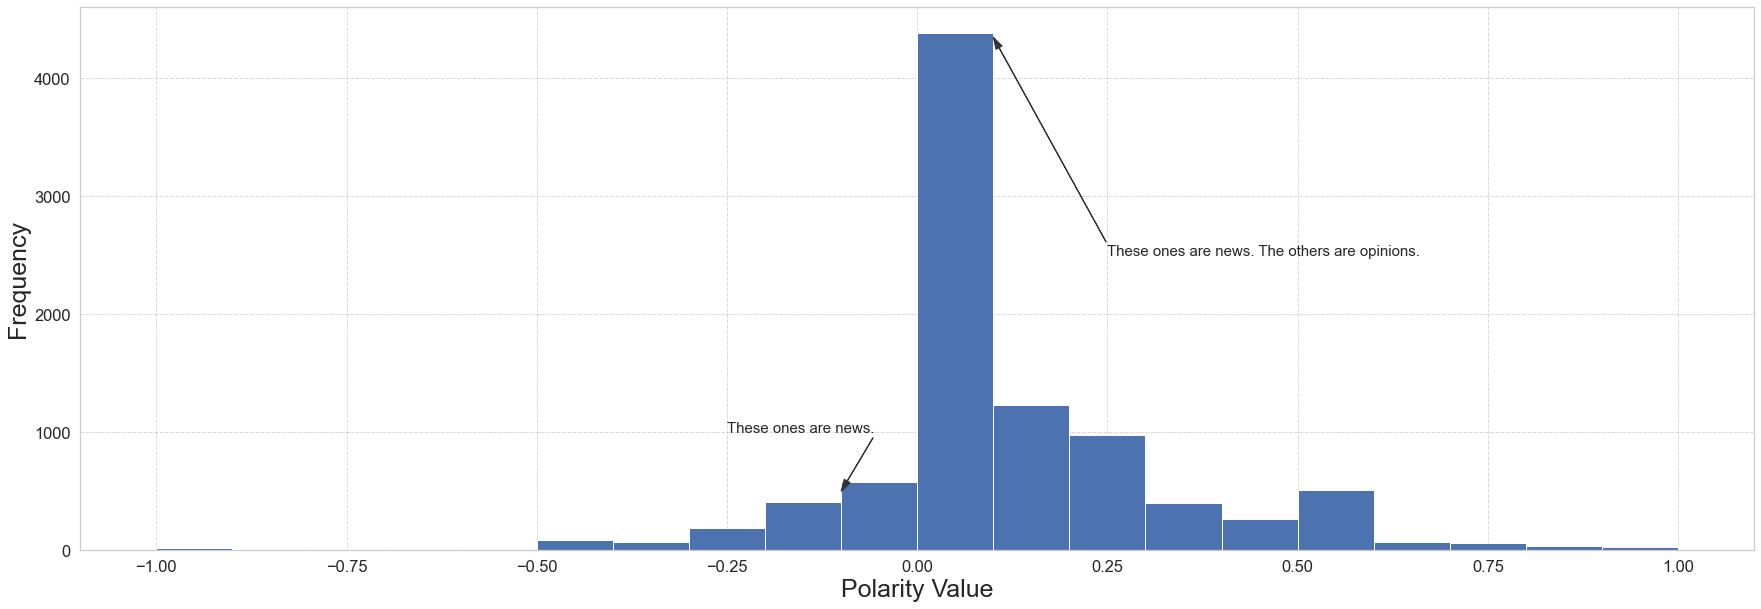

The Tweets with a polarity value inside the -0.1 to 0.1 range are considered as news. Tweets with a minor or greater polarity value than the values' range are considered as opinions.


In [2]:
fig, ax = plt.subplots(figsize=(30, 10))
dN=pd.read_csv("numbers.csv")
bins2=dN["numbers"].to_list()
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6) 
plt.annotate('These ones are news. The others are opinions.', xy=(0.1, 4350), xytext=(0.25, 2500), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
plt.annotate('These ones are news.', xy=(-0.1, 500), xytext=(-0.25, 1000), fontsize=15, arrowprops={'width':-0.4,'headwidth':7,'color':'#333333'})
plt.xlabel('Polarity Value',fontsize=25)
plt.ylabel("Frequency",fontsize=25 )
fullAnalysis["Polarity"].hist(bins=bins2,
             ax=ax) 
  

plt.show()
print("The Tweets with a polarity value inside the -0.1 to 0.1 range are considered as news. Tweets with a minor or greater polarity value than the values' range are considered as opinions.")

In [3]:
indexNames = fullAnalysis[ fullAnalysis["Polarity"] < (-0.0999999999) ].index
fullAnalysis.drop(indexNames , inplace=True)

indexNames = fullAnalysis[ fullAnalysis["Polarity"] > 0.0999999999 ].index
fullAnalysis.drop(indexNames , inplace=True)
fullAnalysis.to_csv("/Users/juandiaz/Documents/GitHub/retoAnalitica/fullAnalysisSinOpi.csv")
sinOpi=pd.read_csv("fullAnalysisSinOpi.csv")
del sinOpi['Unnamed: 0']
display(sinOpi)

,User Name,Followers,Tweet,Polarity
0,APO Group English,10661,coronavirus south africa covid 19 update for s...,0.000000
1,Oxfam International,843670,covid19 is everyone s fight i have covered maj...,0.062500
2,National Herald,99381,2 000 women lawyers write to amitshah seeking ...,0.000000
3,The GAA,398260,you can all playyourpart in the fight against ...,0.000000
4,Livemint,1902888,bihar witnesses biggest single day spike of 2 ...,0.032468
...,...,...,...,...
4820,Khaleej Times,566656,indians with visit visas can t travel to uae y...,0.000000
4821,Louise Starkey,207,guns and bullets are flying off shelves almost...,0.083333
4822,WTKR News 3,103781,buschgardens set to reopen with covid19 safety...,0.000000
4823,NewsMobile,15417,the total number of covid19 samples tested up ...,0.000000


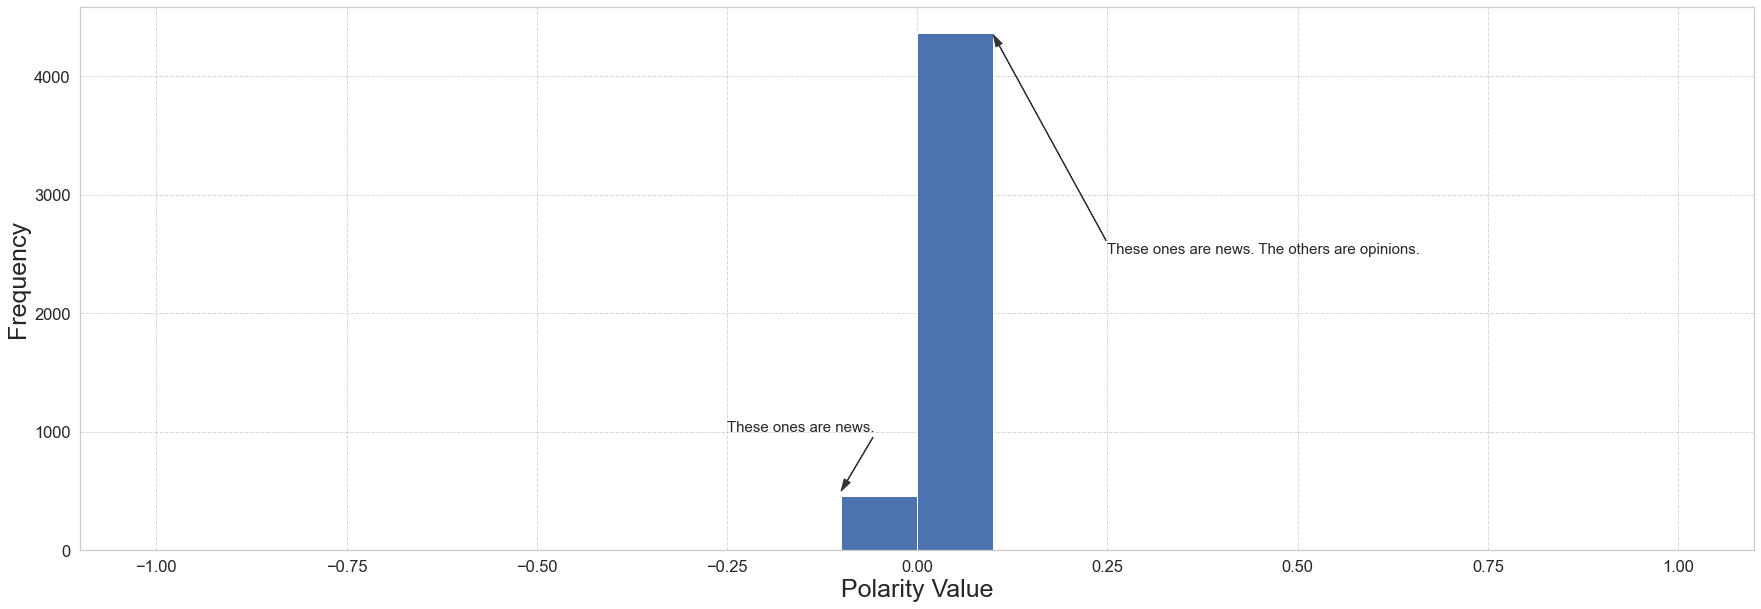

In [4]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6) 
plt.annotate('These ones are news. The others are opinions.', xy=(0.1, 4350), xytext=(0.25, 2500), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
plt.annotate('These ones are news.', xy=(-0.1, 500), xytext=(-0.25, 1000), fontsize=15, arrowprops={'width':-0.4,'headwidth':7,'color':'#333333'})
plt.xlabel('Polarity Value',fontsize=25)
plt.ylabel("Frequency",fontsize=25 )
fullAnalysis1 = fullAnalysis
sinOpi["Polarity"].hist(bins=bins2,
             ax=ax)
plt.show()

,User Name,Followers,Tweet,Polarity
0,CGTN,13882338,chinese mainland reports 36 new covid19 cases,0.068182
1,NDTV,13417047,rajasthanpoliticalcrisis as ashok gehlot met w...,0.000000
2,The Times Of India,12978547,rajasthan government today started a plasma ba...,0.000000
3,United Nations,12748145,whatever you are doing to stop the spread of c...,0.000000
4,China Xinhua News,12677807,rowing bamboo rafts on cisadane river indonesi...,0.000000
...,...,...,...,...
2085,ninette sosa,255,ga prison could an ar prison be next nwark ark...,0.000000
2086,Louise Starkey,204,a mother of a young boy spat at in a revolting...,0.050000
2087,Erin Roney,183,though hair salons can move outside they are v...,0.010877
2088,TUCC,171,whatever you are doing to stop the spread of c...,0.000000


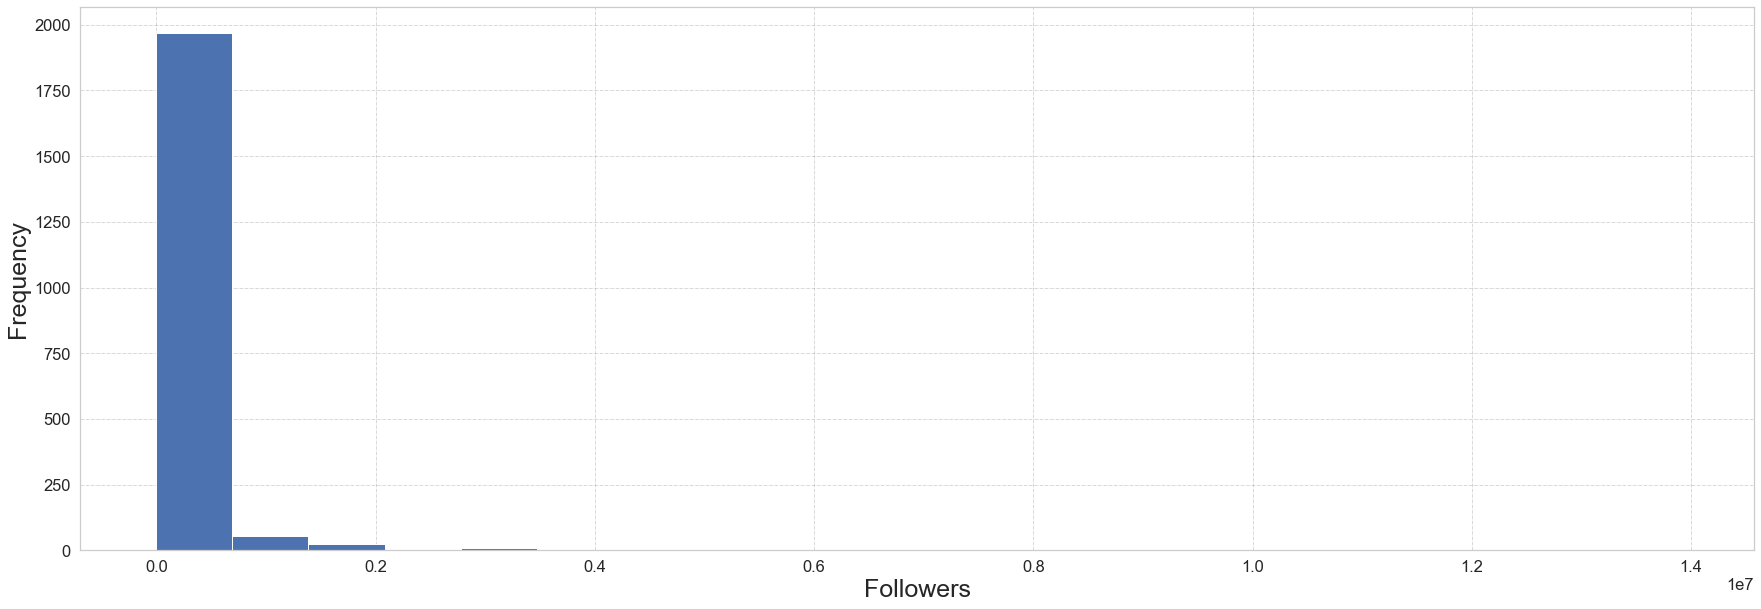

In [5]:
sinOpiR=pd.read_csv("fullAnalysisSinOpiR.csv")
del sinOpiR['Unnamed: 0']
display(sinOpiR)
bins3=20
fig, ax = plt.subplots(figsize=(30, 10))
ax.grid(b = True, color ='grey',  
        linestyle ='-.', linewidth = 0.5,  
        alpha = 0.6)
plt.xlabel('Followers',fontsize=25)
plt.ylabel("Frequency",fontsize=25 )
fullAnalysis1 = sinOpiR["Followers"].hist(bins=bins3,ax=ax)
plt.show()